In [8]:
import numpy as np
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm

import scipy
import scipy.signal
from scipy.spatial import distance
import librosa
import matplotlib.spines as spines
import matplotlib.lines as lines
import matplotlib.pyplot as plt

import itertools
import seaborn as sns
from scipy.interpolate import interp1d

In [9]:
# def read_in(fn):
#     values = []
#     labels = []
#     with open(fn, 'r') as f:
#         for n, line in enumerate(f):

#             parts = line.split()
#             score = round(float(parts[-1]), 2)
#             epoch = parts[0].split(':')[0]
#             values.append(score)
#             labels.append(int(epoch))

#     return values, labels


# english_fn = Path(f'../english/results/files/trajectory_cpc_alexnet_1.txt')
# dutch_english_fn = Path(f'../dutch_english/results/files/trajectory_cpc_alexnet_1.txt')
# english_french_fn = Path(f'../english_french/results/files/trajectory_cpc_alexnet_1.txt')
# dutch_english_french_fn = Path(f'../dutch_english_french/results/files/trajectory_cpc_alexnet_1.txt')


# english_values, english_labels = read_in(english_fn)
# dutch_english_values, dutch_english_labels = read_in(dutch_english_fn)
# english_french_values, english_french_labels = read_in(english_french_fn)
# dutch_english_french_values, dutch_english_french_labels = read_in(dutch_english_french_fn)
# baseline_values, baseline_labels = read_in(Path('../english/results/files/baseline_trajectory.txt'))



# plt.figure(figsize=(20, 5))
# plt.plot(np.asarray(english_labels), np.asarray(english_values), color='green', label='English')
# plt.plot(np.asarray(dutch_english_labels), np.asarray(dutch_english_values), color='purple', label='Dutch-English')
# plt.plot(np.asarray(english_french_labels), np.asarray(english_french_values), color='orange', label='English-French')
# plt.plot(np.asarray(dutch_english_french_labels), np.asarray(dutch_english_french_values), color='red', label='Dutch-English-French')
# plt.plot(np.asarray(baseline_labels), np.asarray(baseline_values), color='black', label='Random baseline')

# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
# axes = plt.gca()
# axes.spines[['top', 'right']].set_visible(False) 

# #     print(max_ME_val)
# #     plt.plot([max_ME_ind], [values[max_ME_ind]], marker="X", markersize=10, markeredgecolor="darkgreen", markerfacecolor="darkgreen", label='Overall best possible MEscore', linestyle="None")
# #     plt.annotate(f'{values[max_ME_ind]:<.2f}%', (max_ME_ind-1, values[max_ME_ind]+1), fontsize=16, ha='center')
# #     plt.plot([chosen_epoch], [values[chosen_epoch]], marker="s", markersize=10, markeredgecolor="black", markerfacecolor="black", label='Chosen ME score based on validation task', linestyle="None")
# #     plt.annotate(f'{values[chosen_epoch]:<.2f}%', (chosen_epoch-1, values[chosen_epoch]-4), fontsize=16, ha='center')

# #     print(max_familiar_val, familiar_values[max_familiar_ind], values[max_familiar_ind])
# #     plt.plot([max_familiar_ind], [values[max_familiar_ind]], marker="o", markersize=10, markeredgecolor="mediumorchid", markerfacecolor="mediumorchid", label='ME score chosen at best familiar-familiar score', linestyle="None")
# #     plt.annotate(f'{values[max_familiar_ind]:<.2f}%', (max_familiar_ind-1, values[max_familiar_ind]+1), fontsize=16, ha='center')
# #     plt.plot([max_familiar_ind], [familiar_values[max_familiar_ind]], marker="o", markersize=10, markeredgecolor="mediumorchid", markerfacecolor="mediumorchid")
# #     plt.annotate(f'{familiar_values[max_familiar_ind]:<.2f}%', (max_familiar_ind-1, familiar_values[max_familiar_ind]+1), fontsize=16, ha='center')

# plt.ylabel('Accuracy', fontsize=18)
# plt.xlabel('Epochs', fontsize=18)
# plt.legend(bbox_to_anchor=(1.0, 0.8), fontsize=18, frameon=False)
# save_fn = Path(f'results/figures/multilingual_1.pdf')
# save_fn.parent.mkdir(parents=True, exist_ok=True)
# plt.savefig(save_fn, bbox_inches='tight')

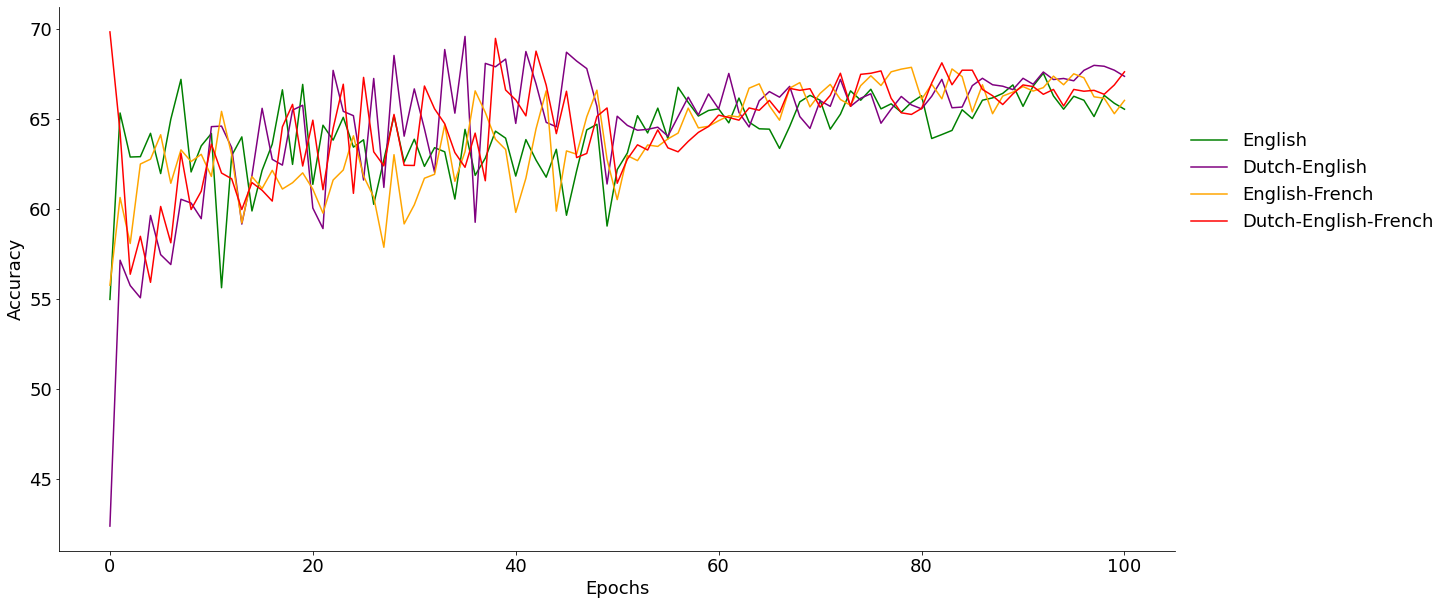

In [10]:
m = 1
def read_in(fn, base=False):
    values = []
    labels = []
    temp = {}
    if base:
        with open(Path(f'{fn}.txt'), 'r') as f:
            for n, line in enumerate(f):

                parts = line.split()
                score = round(float(parts[-1]), 2)
                epoch = int(parts[0].split(':')[0])
                if epoch not in temp: temp[epoch] = []
                temp[epoch].append(score)
    else:
#         for i in range(1, 4):
        i = m
        with open(Path(f'{fn}_{str(i)}.txt'), 'r') as f:
            for n, line in enumerate(f):

                parts = line.split()
                score = round(float(parts[-1]), 2)
                epoch = int(parts[0].split(':')[0])
                if epoch not in temp: temp[epoch] = []
                temp[epoch].append(score)
                
    for epoch in temp:
        score = np.mean(temp[epoch])
        values.append(score)
        labels.append(epoch)

    return values, labels


english_fn = f'../english/results/files/trajectory_cpc_alexnet'
dutch_english_fn = f'../dutch_english/results/files/trajectory_cpc_alexnet'
english_french_fn = f'../english_french/results/files/trajectory_cpc_alexnet'
dutch_english_french_fn = f'../dutch_english_french/results/files/trajectory_cpc_alexnet'


english_values, english_labels = read_in(english_fn)
dutch_english_values, dutch_english_labels = read_in(dutch_english_fn)
english_french_values, english_french_labels = read_in(english_french_fn)
dutch_english_french_values, dutch_english_french_labels = read_in(dutch_english_french_fn)
# baseline_values, baseline_labels = read_in(Path('../english/results/files/baseline_trajectory'), True)



plt.figure(figsize=(20, 10))
plt.plot(np.asarray(english_labels), np.asarray(english_values), color='green', label='English')
plt.plot(np.asarray(dutch_english_labels), np.asarray(dutch_english_values), color='purple', label='Dutch-English')
plt.plot(np.asarray(english_french_labels), np.asarray(english_french_values), color='orange', label='English-French')
plt.plot(np.asarray(dutch_english_french_labels), np.asarray(dutch_english_french_values), color='red', label='Dutch-English-French')
# plt.plot(np.asarray(baseline_labels), np.asarray(baseline_values), color='black', label='Random baseline')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
axes = plt.gca()
axes.spines[['top', 'right']].set_visible(False) 

#     print(max_ME_val)
#     plt.plot([max_ME_ind], [values[max_ME_ind]], marker="X", markersize=10, markeredgecolor="darkgreen", markerfacecolor="darkgreen", label='Overall best possible MEscore', linestyle="None")
#     plt.annotate(f'{values[max_ME_ind]:<.2f}%', (max_ME_ind-1, values[max_ME_ind]+1), fontsize=16, ha='center')
#     plt.plot([chosen_epoch], [values[chosen_epoch]], marker="s", markersize=10, markeredgecolor="black", markerfacecolor="black", label='Chosen ME score based on validation task', linestyle="None")
#     plt.annotate(f'{values[chosen_epoch]:<.2f}%', (chosen_epoch-1, values[chosen_epoch]-4), fontsize=16, ha='center')

#     print(max_familiar_val, familiar_values[max_familiar_ind], values[max_familiar_ind])
#     plt.plot([max_familiar_ind], [values[max_familiar_ind]], marker="o", markersize=10, markeredgecolor="mediumorchid", markerfacecolor="mediumorchid", label='ME score chosen at best familiar-familiar score', linestyle="None")
#     plt.annotate(f'{values[max_familiar_ind]:<.2f}%', (max_familiar_ind-1, values[max_familiar_ind]+1), fontsize=16, ha='center')
#     plt.plot([max_familiar_ind], [familiar_values[max_familiar_ind]], marker="o", markersize=10, markeredgecolor="mediumorchid", markerfacecolor="mediumorchid")
#     plt.annotate(f'{familiar_values[max_familiar_ind]:<.2f}%', (max_familiar_ind-1, familiar_values[max_familiar_ind]+1), fontsize=16, ha='center')

plt.ylabel('Accuracy', fontsize=18)
plt.xlabel('Epochs', fontsize=18)
plt.legend(bbox_to_anchor=(1.0, 0.8), fontsize=18, frameon=False)
save_fn = Path(f'results/figures/multilingual_tied_{str(m)}.pdf')
save_fn.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(save_fn, bbox_inches='tight')

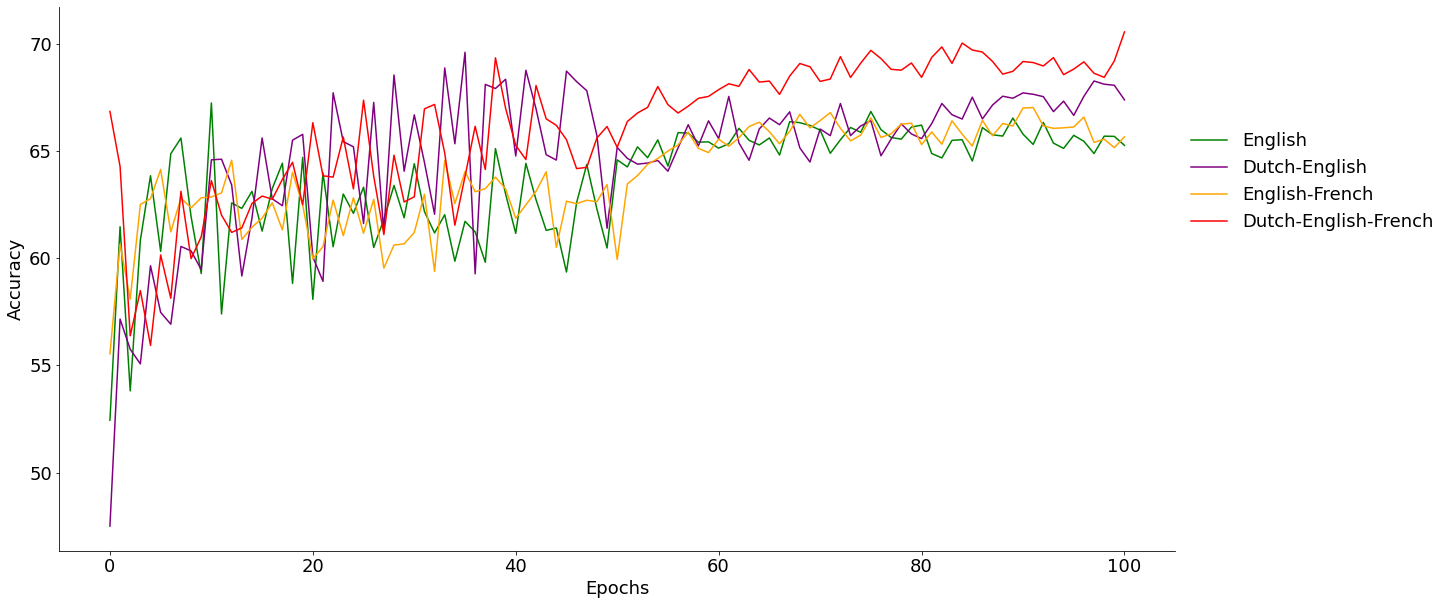

In [11]:
m = 2
def read_in(fn, base=False):
    values = []
    labels = []
    temp = {}
    if base:
        with open(Path(f'{fn}.txt'), 'r') as f:
            for n, line in enumerate(f):

                parts = line.split()
                score = round(float(parts[-1]), 2)
                epoch = int(parts[0].split(':')[0])
                if epoch not in temp: temp[epoch] = []
                temp[epoch].append(score)
    else:
        for i in range(1, m+1):
            with open(Path(f'{fn}_{str(i)}.txt'), 'r') as f:
                for n, line in enumerate(f):

                    parts = line.split()
                    score = round(float(parts[-1]), 2)
                    epoch = int(parts[0].split(':')[0])
                    if epoch not in temp: temp[epoch] = []
                    temp[epoch].append(score)
                
    for epoch in temp:
        score = np.mean(temp[epoch])
        values.append(score)
        labels.append(epoch)

    return values, labels


english_fn = f'../english/results/files/trajectory_cpc_alexnet'
dutch_english_fn = f'../dutch_english/results/files/trajectory_cpc_alexnet'
english_french_fn = f'../english_french/results/files/trajectory_cpc_alexnet'
dutch_english_french_fn = f'../dutch_english_french/results/files/trajectory_cpc_alexnet'


english_values, english_labels = read_in(english_fn)
dutch_english_values, dutch_english_labels = read_in(dutch_english_fn)
english_french_values, english_french_labels = read_in(english_french_fn)
dutch_english_french_values, dutch_english_french_labels = read_in(dutch_english_french_fn)
# baseline_values, baseline_labels = read_in(Path('../english/results/files/baseline_trajectory'), True)



plt.figure(figsize=(20, 10))
plt.plot(np.asarray(english_labels), np.asarray(english_values), color='green', label='English')
plt.plot(np.asarray(dutch_english_labels), np.asarray(dutch_english_values), color='purple', label='Dutch-English')
plt.plot(np.asarray(english_french_labels), np.asarray(english_french_values), color='orange', label='English-French')
plt.plot(np.asarray(dutch_english_french_labels), np.asarray(dutch_english_french_values), color='red', label='Dutch-English-French')
# plt.plot(np.asarray(baseline_labels), np.asarray(baseline_values), color='black', label='Random baseline')


plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
axes = plt.gca()
axes.spines[['top', 'right']].set_visible(False) 

#     print(max_ME_val)
#     plt.plot([max_ME_ind], [values[max_ME_ind]], marker="X", markersize=10, markeredgecolor="darkgreen", markerfacecolor="darkgreen", label='Overall best possible MEscore', linestyle="None")
#     plt.annotate(f'{values[max_ME_ind]:<.2f}%', (max_ME_ind-1, values[max_ME_ind]+1), fontsize=16, ha='center')
#     plt.plot([chosen_epoch], [values[chosen_epoch]], marker="s", markersize=10, markeredgecolor="black", markerfacecolor="black", label='Chosen ME score based on validation task', linestyle="None")
#     plt.annotate(f'{values[chosen_epoch]:<.2f}%', (chosen_epoch-1, values[chosen_epoch]-4), fontsize=16, ha='center')

#     print(max_familiar_val, familiar_values[max_familiar_ind], values[max_familiar_ind])
#     plt.plot([max_familiar_ind], [values[max_familiar_ind]], marker="o", markersize=10, markeredgecolor="mediumorchid", markerfacecolor="mediumorchid", label='ME score chosen at best familiar-familiar score', linestyle="None")
#     plt.annotate(f'{values[max_familiar_ind]:<.2f}%', (max_familiar_ind-1, values[max_familiar_ind]+1), fontsize=16, ha='center')
#     plt.plot([max_familiar_ind], [familiar_values[max_familiar_ind]], marker="o", markersize=10, markeredgecolor="mediumorchid", markerfacecolor="mediumorchid")
#     plt.annotate(f'{familiar_values[max_familiar_ind]:<.2f}%', (max_familiar_ind-1, familiar_values[max_familiar_ind]+1), fontsize=16, ha='center')

plt.ylabel('Accuracy', fontsize=18)
plt.xlabel('Epochs', fontsize=18)
plt.legend(bbox_to_anchor=(1.0, 0.8), fontsize=18, frameon=False)
save_fn = Path(f'results/figures/multilingual_tied_{str(m)}.pdf')
save_fn.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(save_fn, bbox_inches='tight')

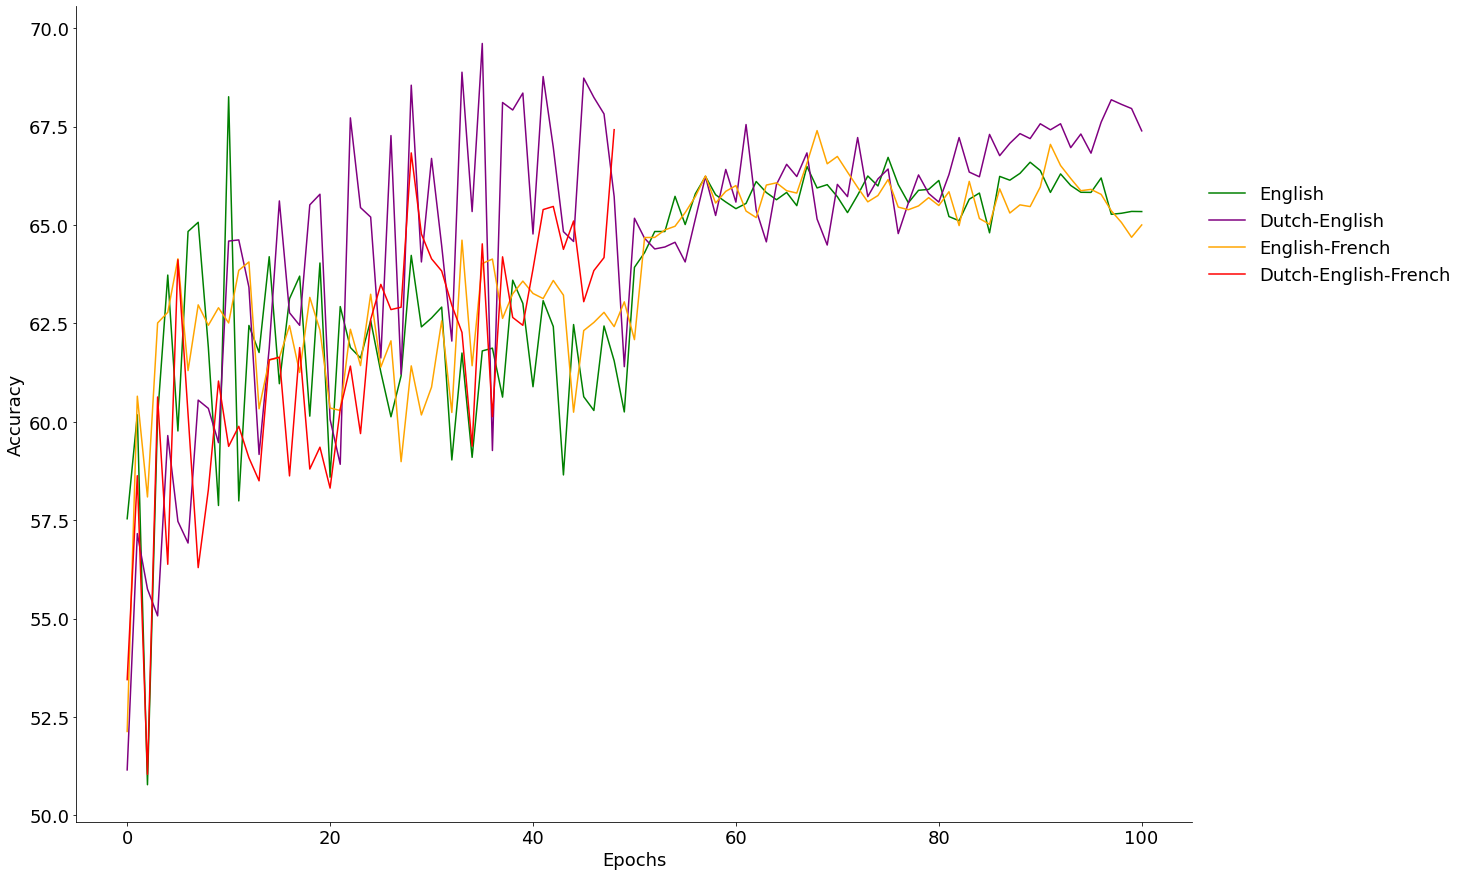

In [15]:
m = 3
def read_in(fn, base=False):
    values = []
    labels = []
    temp = {}
    if base:
        with open(Path(f'{fn}.txt'), 'r') as f:
            for n, line in enumerate(f):

                parts = line.split()
                score = round(float(parts[-1]), 2)
                epoch = int(parts[0].split(':')[0])
                if epoch not in temp: temp[epoch] = []
                temp[epoch].append(score)
    else:
        for i in range(1, m+1):
            if Path(f'{fn}_{str(i)}.txt').is_file() is False: continue
            with open(Path(f'{fn}_{str(i)}.txt'), 'r') as f:
                for n, line in enumerate(f):

                    parts = line.split()
                    score = round(float(parts[-1]), 2)
                    epoch = int(parts[0].split(':')[0])
                    if epoch not in temp: temp[epoch] = []
                    temp[epoch].append(score)
                
    for epoch in temp:
#         if len(temp[epoch]) != 3: print('PROBLEM')
        score = np.mean(temp[epoch])
        values.append(score)
        labels.append(epoch)

    return values, labels


english_fn = f'../english/results/files/trajectory_cpc_alexnet'
dutch_english_fn = f'../dutch_english/results/files/trajectory_cpc_alexnet'
english_french_fn = f'../english_french/results/files/trajectory_cpc_alexnet'
dutch_english_french_fn = f'../test/results/files/trajectory_cpc_alexnet'


english_values, english_labels = read_in(english_fn)
dutch_english_values, dutch_english_labels = read_in(dutch_english_fn)
english_french_values, english_french_labels = read_in(english_french_fn)
dutch_english_french_values, dutch_english_french_labels = read_in(dutch_english_french_fn)
# baseline_values, baseline_labels = read_in(Path('../english/results/files/baseline_trajectory'), True)



plt.figure(figsize=(20, 15))
plt.plot(np.asarray(english_labels), np.asarray(english_values), color='green', label='English')
plt.plot(np.asarray(dutch_english_labels), np.asarray(dutch_english_values), color='purple', label='Dutch-English')
plt.plot(np.asarray(english_french_labels), np.asarray(english_french_values), color='orange', label='English-French')
plt.plot(np.asarray(dutch_english_french_labels), np.asarray(dutch_english_french_values), color='red', label='Dutch-English-French')
# plt.plot(np.asarray(baseline_labels), np.asarray(baseline_values), color='black', label='Random baseline')


plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
axes = plt.gca()
axes.spines[['top', 'right']].set_visible(False) 

#     print(max_ME_val)
#     plt.plot([max_ME_ind], [values[max_ME_ind]], marker="X", markersize=10, markeredgecolor="darkgreen", markerfacecolor="darkgreen", label='Overall best possible MEscore', linestyle="None")
#     plt.annotate(f'{values[max_ME_ind]:<.2f}%', (max_ME_ind-1, values[max_ME_ind]+1), fontsize=16, ha='center')
#     plt.plot([chosen_epoch], [values[chosen_epoch]], marker="s", markersize=10, markeredgecolor="black", markerfacecolor="black", label='Chosen ME score based on validation task', linestyle="None")
#     plt.annotate(f'{values[chosen_epoch]:<.2f}%', (chosen_epoch-1, values[chosen_epoch]-4), fontsize=16, ha='center')

#     print(max_familiar_val, familiar_values[max_familiar_ind], values[max_familiar_ind])
#     plt.plot([max_familiar_ind], [values[max_familiar_ind]], marker="o", markersize=10, markeredgecolor="mediumorchid", markerfacecolor="mediumorchid", label='ME score chosen at best familiar-familiar score', linestyle="None")
#     plt.annotate(f'{values[max_familiar_ind]:<.2f}%', (max_familiar_ind-1, values[max_familiar_ind]+1), fontsize=16, ha='center')
#     plt.plot([max_familiar_ind], [familiar_values[max_familiar_ind]], marker="o", markersize=10, markeredgecolor="mediumorchid", markerfacecolor="mediumorchid")
#     plt.annotate(f'{familiar_values[max_familiar_ind]:<.2f}%', (max_familiar_ind-1, familiar_values[max_familiar_ind]+1), fontsize=16, ha='center')

plt.ylabel('Accuracy', fontsize=18)
plt.xlabel('Epochs', fontsize=18)
plt.legend(bbox_to_anchor=(1.0, 0.8), fontsize=18, frameon=False)
save_fn = Path(f'results/figures/multilingual_tied_{str(m)}.pdf')
save_fn.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(save_fn, bbox_inches='tight')

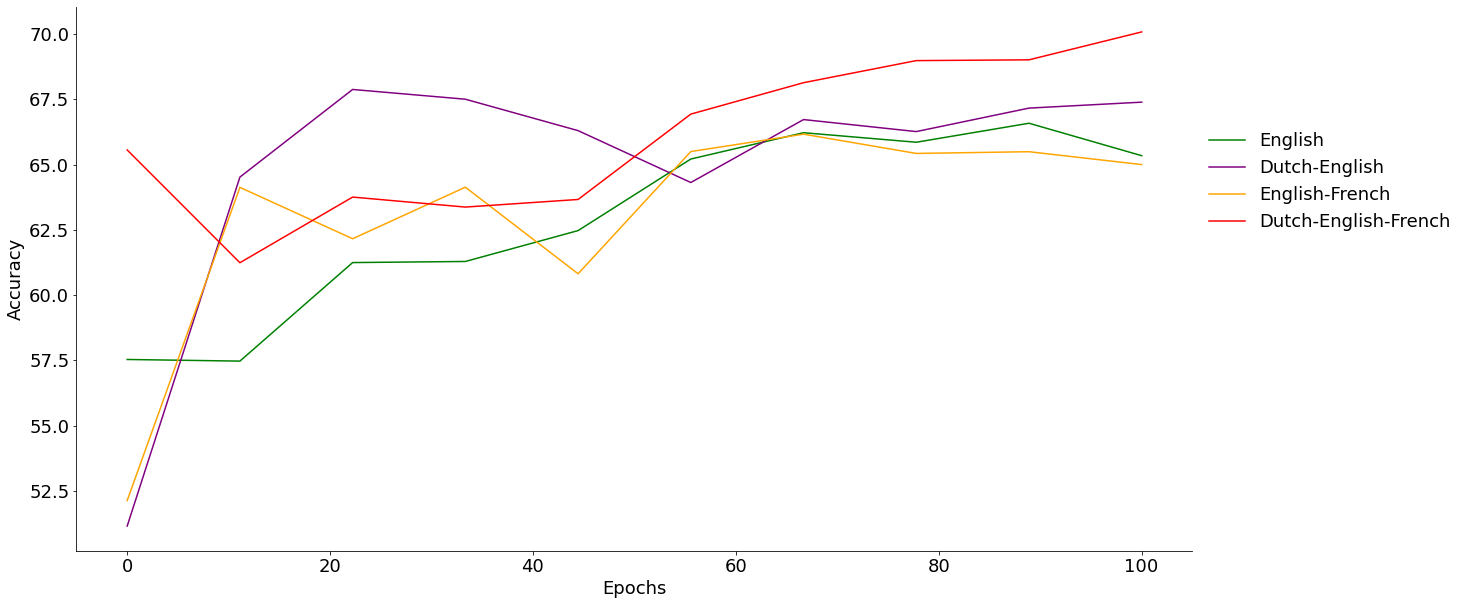

In [16]:
from scipy.interpolate import make_interp_spline, BSpline

m = 3
def read_in(fn, base=False):
    values = []
    labels = []
    temp = {}
    if base:
        with open(Path(f'{fn}.txt'), 'r') as f:
            for n, line in enumerate(f):

                parts = line.split()
                score = round(float(parts[-1]), 2)
                epoch = int(parts[0].split(':')[0])
                if epoch not in temp: temp[epoch] = []
                temp[epoch].append(score)
    else:
        for i in range(1, m+1):
            with open(Path(f'{fn}_{str(i)}.txt'), 'r') as f:
                for n, line in enumerate(f):

                    parts = line.split()
                    score = round(float(parts[-1]), 2)
                    epoch = int(parts[0].split(':')[0])
                    if epoch not in temp: temp[epoch] = []
                    temp[epoch].append(score)
                
    for epoch in temp:
        score = np.mean(temp[epoch])
        values.append(score)
        labels.append(epoch)

    return values, labels


english_fn = f'../english/results/files/trajectory_cpc_alexnet'
dutch_english_fn = f'../dutch_english/results/files/trajectory_cpc_alexnet'
english_french_fn = f'../english_french/results/files/trajectory_cpc_alexnet'
dutch_english_french_fn = f'../dutch_english_french/results/files/trajectory_cpc_alexnet'


english_values, english_labels = read_in(english_fn)
dutch_english_values, dutch_english_labels = read_in(dutch_english_fn)
english_french_values, english_french_labels = read_in(english_french_fn)
dutch_english_french_values, dutch_english_french_labels = read_in(dutch_english_french_fn)
# baseline_values, baseline_labels = read_in(Path('../english/results/files/baseline_trajectory'), True)



plt.figure(figsize=(20, 10))

constant = 7
points = 10

y = np.asarray(english_values)
x = np.asarray(english_labels)
xnew = np.linspace(x.min(), x.max(), points)
y = make_interp_spline(x, y, k=constant) 
y = y(xnew)
plt.plot(xnew, y, color='green', label='English')

y = np.asarray(dutch_english_values)
x = np.asarray(dutch_english_labels)
xnew = np.linspace(x.min(), x.max(), points)
y = make_interp_spline(x, y, k=constant) 
y = y(xnew)
plt.plot(xnew, y, color='purple', label='Dutch-English')

y = np.asarray(english_french_values)
x = np.asarray(english_french_labels)
xnew = np.linspace(x.min(), x.max(), points)
y = make_interp_spline(x, y, k=constant) 
y = y(xnew)
plt.plot(xnew, y, color='orange', label='English-French')

y = np.asarray(dutch_english_french_values)
x = np.asarray(dutch_english_french_labels)
xnew = np.linspace(x.min(), x.max(), points)
y = make_interp_spline(x, y, k=constant) 
y = y(xnew)
plt.plot(xnew, y, color='red', label='Dutch-English-French')
# plt.plot(np.asarray(baseline_labels), np.asarray(baseline_values), color='black', label='Random baseline')


plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
axes = plt.gca()
axes.spines[['top', 'right']].set_visible(False) 

#     print(max_ME_val)
#     plt.plot([max_ME_ind], [values[max_ME_ind]], marker="X", markersize=10, markeredgecolor="darkgreen", markerfacecolor="darkgreen", label='Overall best possible MEscore', linestyle="None")
#     plt.annotate(f'{values[max_ME_ind]:<.2f}%', (max_ME_ind-1, values[max_ME_ind]+1), fontsize=16, ha='center')
#     plt.plot([chosen_epoch], [values[chosen_epoch]], marker="s", markersize=10, markeredgecolor="black", markerfacecolor="black", label='Chosen ME score based on validation task', linestyle="None")
#     plt.annotate(f'{values[chosen_epoch]:<.2f}%', (chosen_epoch-1, values[chosen_epoch]-4), fontsize=16, ha='center')

#     print(max_familiar_val, familiar_values[max_familiar_ind], values[max_familiar_ind])
#     plt.plot([max_familiar_ind], [values[max_familiar_ind]], marker="o", markersize=10, markeredgecolor="mediumorchid", markerfacecolor="mediumorchid", label='ME score chosen at best familiar-familiar score', linestyle="None")
#     plt.annotate(f'{values[max_familiar_ind]:<.2f}%', (max_familiar_ind-1, values[max_familiar_ind]+1), fontsize=16, ha='center')
#     plt.plot([max_familiar_ind], [familiar_values[max_familiar_ind]], marker="o", markersize=10, markeredgecolor="mediumorchid", markerfacecolor="mediumorchid")
#     plt.annotate(f'{familiar_values[max_familiar_ind]:<.2f}%', (max_familiar_ind-1, familiar_values[max_familiar_ind]+1), fontsize=16, ha='center')

plt.ylabel('Accuracy', fontsize=18)
plt.xlabel('Epochs', fontsize=18)
plt.legend(bbox_to_anchor=(1.0, 0.8), fontsize=18, frameon=False)
save_fn = Path(f'results/figures/multilingual_tied_{str(m)}.pdf')
save_fn.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(save_fn, bbox_inches='tight')

In [7]:
# m = 3
# def read_in(fn, base=False):
#     values = []
#     labels = []
#     temp = {}
#     if base:
#         with open(Path(f'{fn}.txt'), 'r') as f:
#             for n, line in enumerate(f):

#                 parts = line.split()
#                 score = round(float(parts[-1]), 2)
#                 epoch = int(parts[0].split(':')[0])
#                 if epoch not in temp: temp[epoch] = []
#                 temp[epoch].append(score)
#     else:
#         for i in range(1, m+1):
#             with open(Path(f'{fn}_{str(i)}.txt'), 'r') as f:
#                 for n, line in enumerate(f):

#                     parts = line.split()
#                     score = round(float(parts[-1]), 2)
#                     epoch = int(parts[0].split(':')[0])
#                     if epoch not in temp: temp[epoch] = []
#                     temp[epoch].append(score)
                
#     for epoch in temp:
#         score = np.mean(temp[epoch])
#         values.append(score)
#         labels.append(epoch)
#     print(fn, np.max(values))
#     return values, labels


# english_fn = f'../english/results/files/mismatched_trajectory_cpc_alexnet'
# dutch_english_fn = f'../dutch_english/results/files/mismatched_trajectory_cpc_alexnet'
# english_french_fn = f'../english_french/results/files/mismatched_trajectory_cpc_alexnet'
# dutch_english_french_fn = f'../dutch_english_french/results/files/mismatched_trajectory_cpc_alexnet'


# english_values, english_labels = read_in(english_fn)
# dutch_english_values, dutch_english_labels = read_in(dutch_english_fn)
# english_french_values, english_french_labels = read_in(english_french_fn)
# dutch_english_french_values, dutch_english_french_labels = read_in(dutch_english_french_fn)
# baseline_values, baseline_labels = read_in(Path('../english/results/files/baseline_trajectory'), True)



# plt.figure(figsize=(20, 10))
# plt.plot(np.asarray(english_labels), np.asarray(english_values), color='green', label='English')
# plt.plot(np.asarray(dutch_english_labels), np.asarray(dutch_english_values), color='purple', label='Dutch-English')
# plt.plot(np.asarray(english_french_labels), np.asarray(english_french_values), color='orange', label='English-French')
# plt.plot(np.asarray(dutch_english_french_labels), np.asarray(dutch_english_french_values), color='red', label='Dutch-English-French')
# plt.plot(np.asarray(baseline_labels), np.asarray(baseline_values), color='black', label='Random baseline')

# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
# axes = plt.gca()
# axes.spines[['top', 'right']].set_visible(False) 

# plt.ylabel('Accuracy', fontsize=18)
# plt.xlabel('Epochs', fontsize=18)
# plt.legend(ncol=5, loc='lower center', bbox_to_anchor=(0.5, -0.4), fontsize=18, frameon=False)
# save_fn = Path(f'results/figures/mismatched_multilingual_tied_{str(m)}.pdf')
# save_fn.parent.mkdir(parents=True, exist_ok=True)
# plt.savefig(save_fn, bbox_inches='tight')